<a href="https://colab.research.google.com/github/SUBHRA15012001/Subhra-VS/blob/main/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
## Importing Pnemonia dataset
!kaggle datasets download -d lasaljaywardena/pneumonia-chest-x-ray-dataset

 98% 1.12G/1.14G [00:08<00:00, 168MB/s]
100% 1.14G/1.14G [00:08<00:00, 137MB/s]


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/pneumonia-chest-x-ray-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

kaggle.json  pneumonia-chest-x-ray-dataset.zip	sample_data  test  train  val


In [ ]:
## Importing the dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_pneumonia_files = os.listdir('/content/train/pneumonia')
print (with_pnumonia_files[0:5])
print(with_pnumonia_files[-5:])

['person548_bacteria_2297.jpeg', 'person1109_bacteria_3050.jpeg', 'person1115_virus_1840.jpeg', 'person25_bacteria_114.jpeg', 'person82_virus_154.jpeg']
['person77_bacteria_376.jpeg', 'person1312_bacteria_3319.jpeg', 'person415_bacteria_1837.jpeg', 'person346_virus_708.jpeg', 'person51_bacteria_246.jpeg']


In [ ]:
without_pneumonia_files = os.listdir('/content/train/normal')
print (without_pnumonia_files[0:5])
print(without_pnumonia_files[-5:])

['NORMAL2-IM-1274-0001.jpeg', 'NORMAL2-IM-0455-0001.jpeg', 'IM-0479-0001.jpeg', 'NORMAL2-IM-1362-0001.jpeg', 'NORMAL2-IM-1142-0001.jpeg']
['IM-0477-0001.jpeg', 'IM-0424-0001.jpeg', 'NORMAL2-IM-1267-0001.jpeg', 'IM-0624-0001.jpeg', 'IM-0563-0001.jpeg']


In [ ]:
print('Number of with pnumonia images:', len(with_pnumonia_files))
print('Number of without pnumonia images:', len(without_pnumonia_files))

Number of with pnumonia images: 3875
Number of without pnumonia images: 1341


In [ ]:
## creating labels for the two class of images
# with_mask=1
# without_mask=0
with_pneumonia_label=[1]*3875
without_pneumonia_label=[0]*1341

In [ ]:
print(with_pneumonia_label[0:5])
print(without_pneumonia_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_pneumonia_label))
print(len(without_pneumonia_label))

3875
1341


In [ ]:
labels=with_pneumonia_label + without_pneumonia_label
print(len(labels))
print(labels[0:5])
print(labels[-5:])

5216
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


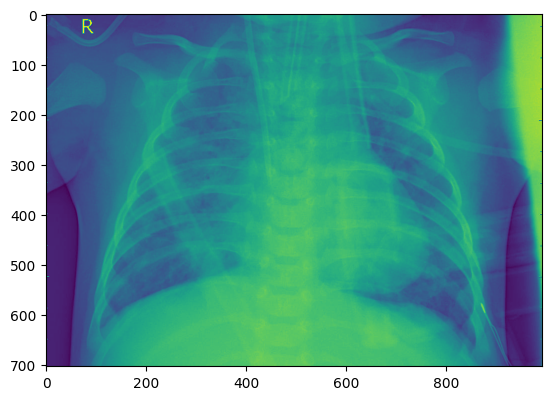

In [ ]:
# Displaying the images
# display with pneumonia image
img=mpimg.imread('/content/train/pneumonia/person548_bacteria_2297.jpeg')
imgplot = plt.imshow(img)
plt.show()

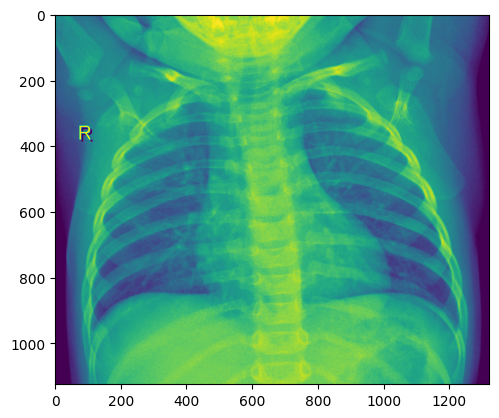

In [ ]:
# display without mask image
img=mpimg.imread('/content/train/normal/NORMAL2-IM-1274-0001.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# As images are of differnent size we need to take care of this during image processing
#IMAGE PROCESSING
#1. Resize image
#2. convert images to numpy arrays



In [ ]:
# convert images to numpy arrays
with_pneumonia_path = '/content/train/pneumonia/'

data = []

for img_file in with_pneumonia_files:
  image = Image.open(with_pneumonia_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



  without_pneumonia_path = '/content/train/normal/'



for img_file in without_pneumonia_files:
  image = Image.open(without_pneumonia_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)






In [ ]:
type(data)

list

In [ ]:
data[0]


array([[[ 45,  45,  45],
        [ 47,  47,  47],
        [ 49,  49,  49],
        ...,
        [204, 204, 204],
        [207, 207, 207],
        [208, 208, 208]],

       [[ 48,  48,  48],
        [ 55,  55,  55],
        [ 51,  51,  51],
        ...,
        [205, 205, 205],
        [208, 208, 208],
        [211, 211, 211]],

       [[ 48,  48,  48],
        [ 64,  64,  64],
        [ 57,  57,  57],
        ...,
        [205, 205, 205],
        [208, 208, 208],
        [211, 211, 211]],

       ...,

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [ 25,  25,  25],
        [ 37,  37,  37],
        [ 59,  59,  59]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [ 28,  28,  28],
        [ 41,  41,  41],
        [ 62,  62,  62]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [ 31,  31,  31],
        [ 42,  42,  42],
        [ 64,  64,  64]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
len(data)

5216

In [ ]:
# converting image list and label list to numpy arrays

X=np.array(data)
Y=np.array(labels)

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(5216, 128, 128, 3)
(5216,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
# Split train test


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape,X_test.shape)

(5216, 128, 128, 3) (4172, 128, 128, 3) (1044, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.43529412, 0.43529412, 0.43529412],
        [0.36470588, 0.36470588, 0.36470588],
        [0.20392157, 0.20392157, 0.20392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.26666667, 0.26666667, 0.26666667],
        [0.25490196, 0.25490196, 0.25490196],
        [0.14117647, 0.14117647, 0.14117647]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.10588235, 0.10588235, 0.10588235],
        [0.07058824, 0.07058824, 0.07058824],
        [0.04705882, 0.04705882, 0.04705882]],

       ...,

       [[0.03137255, 0.03137255, 0.03137255],
        [0.01568627, 0.01568627, 0.01568627],
        [0.02352941, 0

In [ ]:
# Now image processing part is completed , now lets build the convolution neural network(CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [ ]:
# compile neural network setting optimisation and loss fn.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# training the neural network
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
118/118 [==============================] - 14s 23ms/step - loss: 0.4244 - acc: 0.7917 - val_loss: 0.1531 - val_acc: 0.9474
Epoch 2/5
118/118 [==============================] - 2s 17ms/step - loss: 0.1971 - acc: 0.9259 - val_loss: 0.1479 - val_acc: 0.9426
Epoch 3/5
118/118 [==============================] - 2s 18ms/step - loss: 0.1940 - acc: 0.9390 - val_loss: 0.1763 - val_acc: 0.9354
Epoch 4/5
118/118 [==============================] - 2s 17ms/step - loss: 0.1384 - acc: 0.9507 - val_loss: 0.1099 - val_acc: 0.9545
Epoch 5/5
118/118 [==============================] - 2s 19ms/step - loss: 0.1193 - acc: 0.9582 - val_loss: 0.1144 - val_acc: 0.9593


In [ ]:

# Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =' , accuracy)

33/33 [==============================] - 0s 12ms/step - loss: 0.0904 - acc: 0.9665
Test Accuracy = 0.9664750695228577


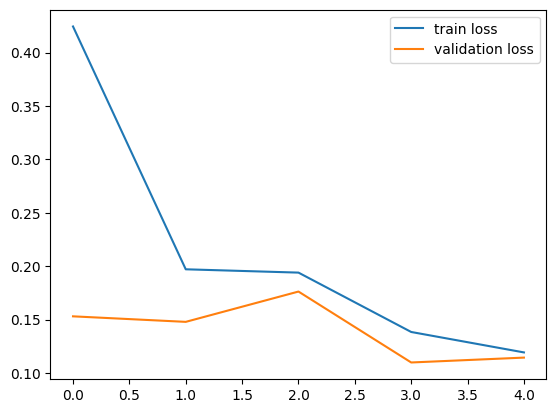

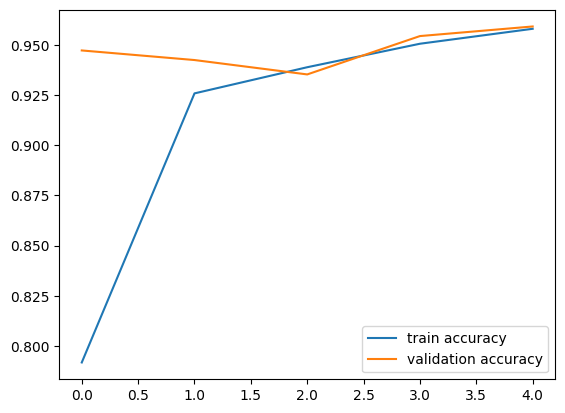

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()



In [ ]:

# Predictive System

Path of the image to be predicted: /content/val/pneumonia/person1947_bacteria_4876.jpeg


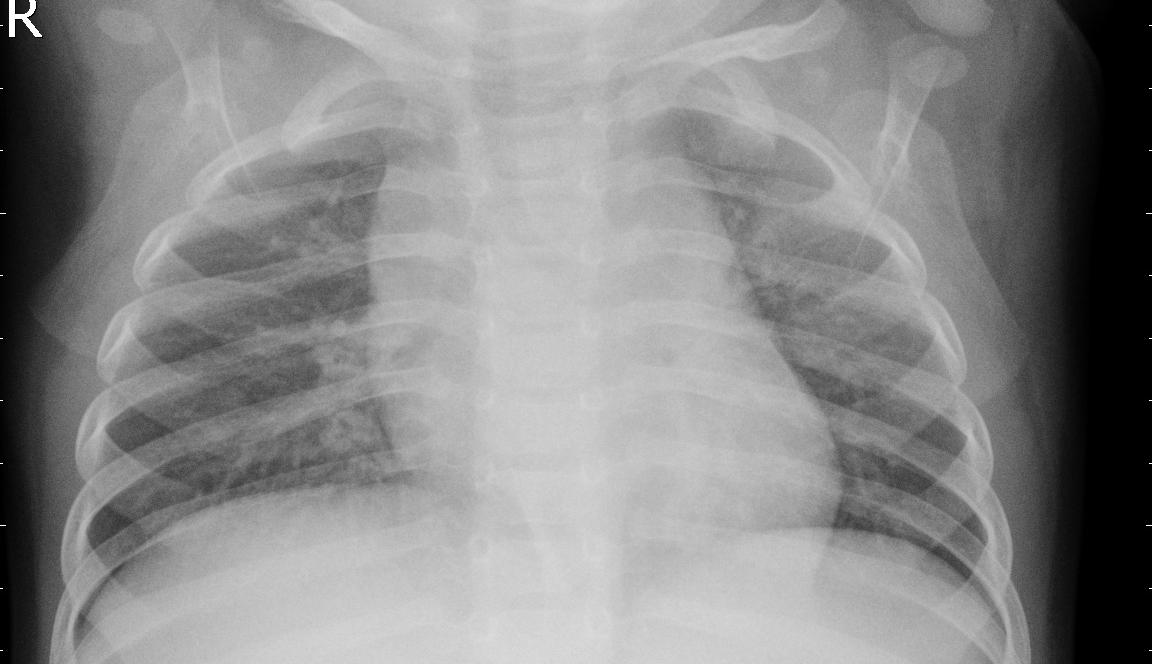

1/1 [==============================] - 0s 46ms/step
[[8.152262e-04 9.792413e-01]]
1
The person is suffering from pneumonia


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped= np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if (input_pred_label == 1):

  print('The person is suffering from pneumonia')

else:

  print('The person is normal')

